## Step-by-Step Process for Exploratory Data Analysis in Python

Following the process by [Andrea D'Agostino](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee).

### Process Steps:

1. Importing a dataset

2. Understanding the big picture

3. Preparation

4. Understanding of variables

5. Studying the relationship between variables

6. Brainstorming (Iterate with step 4, if necessary)

7. Either reporting or modelling

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns

In [2]:
# Applying style
plt.style.use('ggplot')
rcParams['figure.figsize'] = (12, 6)

### 1. Importing dataset

In [3]:
# Import example dataset
from sklearn.datasets import load_wine

In [5]:
wine = load_wine()

df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

### 2. Understanding the big picture

* "Trying to understand the problem we want to solve, thinking about the entire dataset and the meaning of the variables"

* Identifying variables, type of variables, context, **expectation** (relevance) and comments

* Defining what our goal is: Identify the type of wine: 0, 1 and 2.

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [8]:
df.shape

(178, 14)

In [9]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [11]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [12]:
df.isna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df['target'].unique()

array([0, 1, 2])

### 3. Preparation

We want to clear our dataset:

* Are there any useless or redundant variables?

* Are there any duplicate columns?

* Does the nomenclature make sense?

* Are there any new variables we want to create?

In [14]:
# Check column names
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [15]:
# Check duplicates
df.duplicated().sum()

0

In [16]:
# Rename 'od280/od315_of_diluted_wines' column
df.rename(columns={'od280/od315_of_diluted_wines': 'protein_concentration'}, inplace=True)

In [17]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,protein_concentration,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'protein_concentration',
       'proline', 'target'],
      dtype='object')

### 4. Understanding the variables

#### Categorical variables

In [19]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [20]:
# Normalised
df.target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

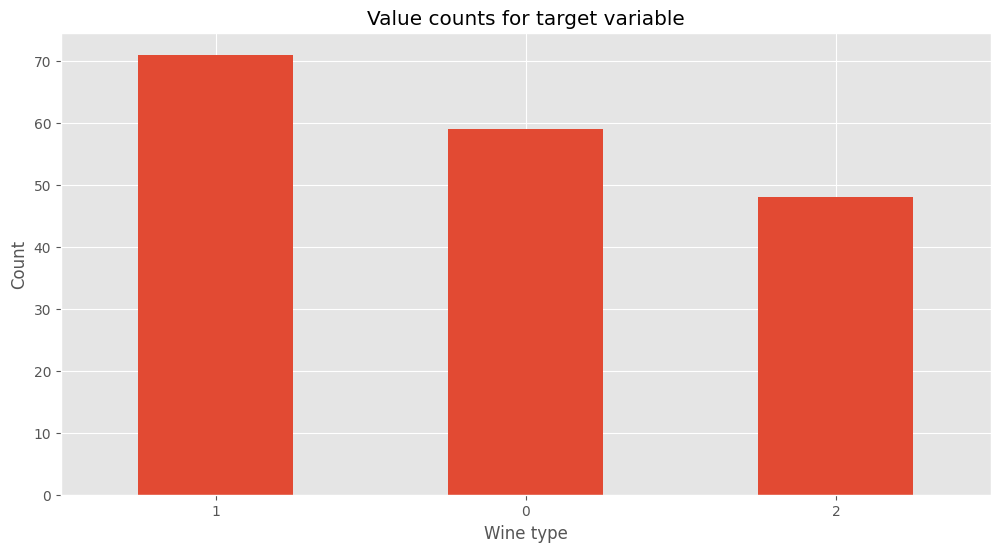

In [21]:
# Creating a bar chart
df.target.value_counts().plot(kind='bar')
plt.title('Value counts for target variable')
plt.xlabel('Wine type')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

Class 2 appears less than the other two classes (unbalanced). We may need balancing techniques in a future modelling phase.

#### Numeric variables

In [22]:
df.magnesium.describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

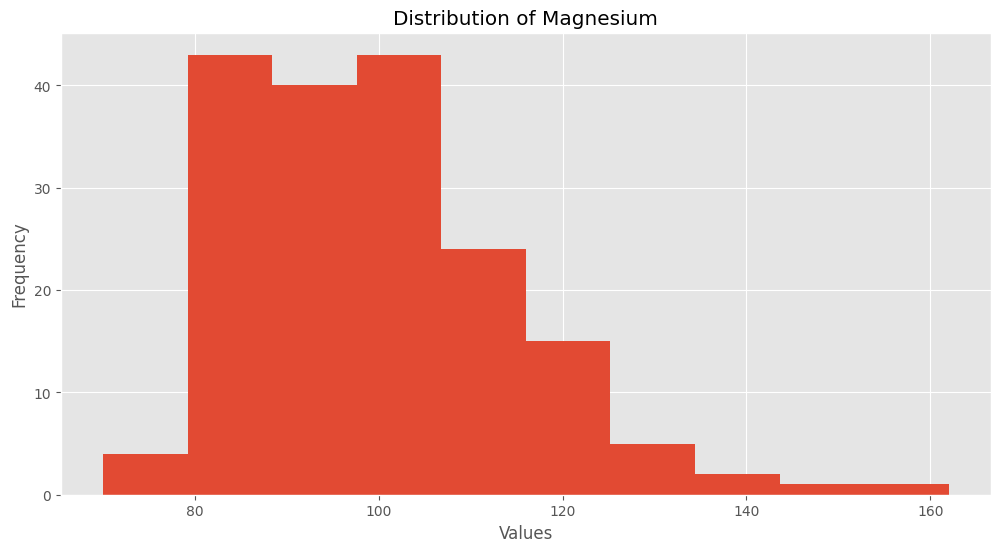

In [23]:
# Creating a histogram
df.magnesium.plot(kind='hist')
plt.title('Distribution of Magnesium')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Evaluate kurtosis and asymmetry
print(f'Skewness: {df["magnesium"].skew()}')
print(f'Kurtosis: {df["magnesium"].kurt()}')

Skewness: 1.098191054755161
Kurtosis: 2.1049913235905557


The distribution of magnesium data:

* Does not follow a normal curve

* Show spikes

* Has kurtosis and asymmetry values greater than 1.

### 4. Study the relationship between variables

"Find interesting relationships that show the influece of one variable on the other, preferably on the target"

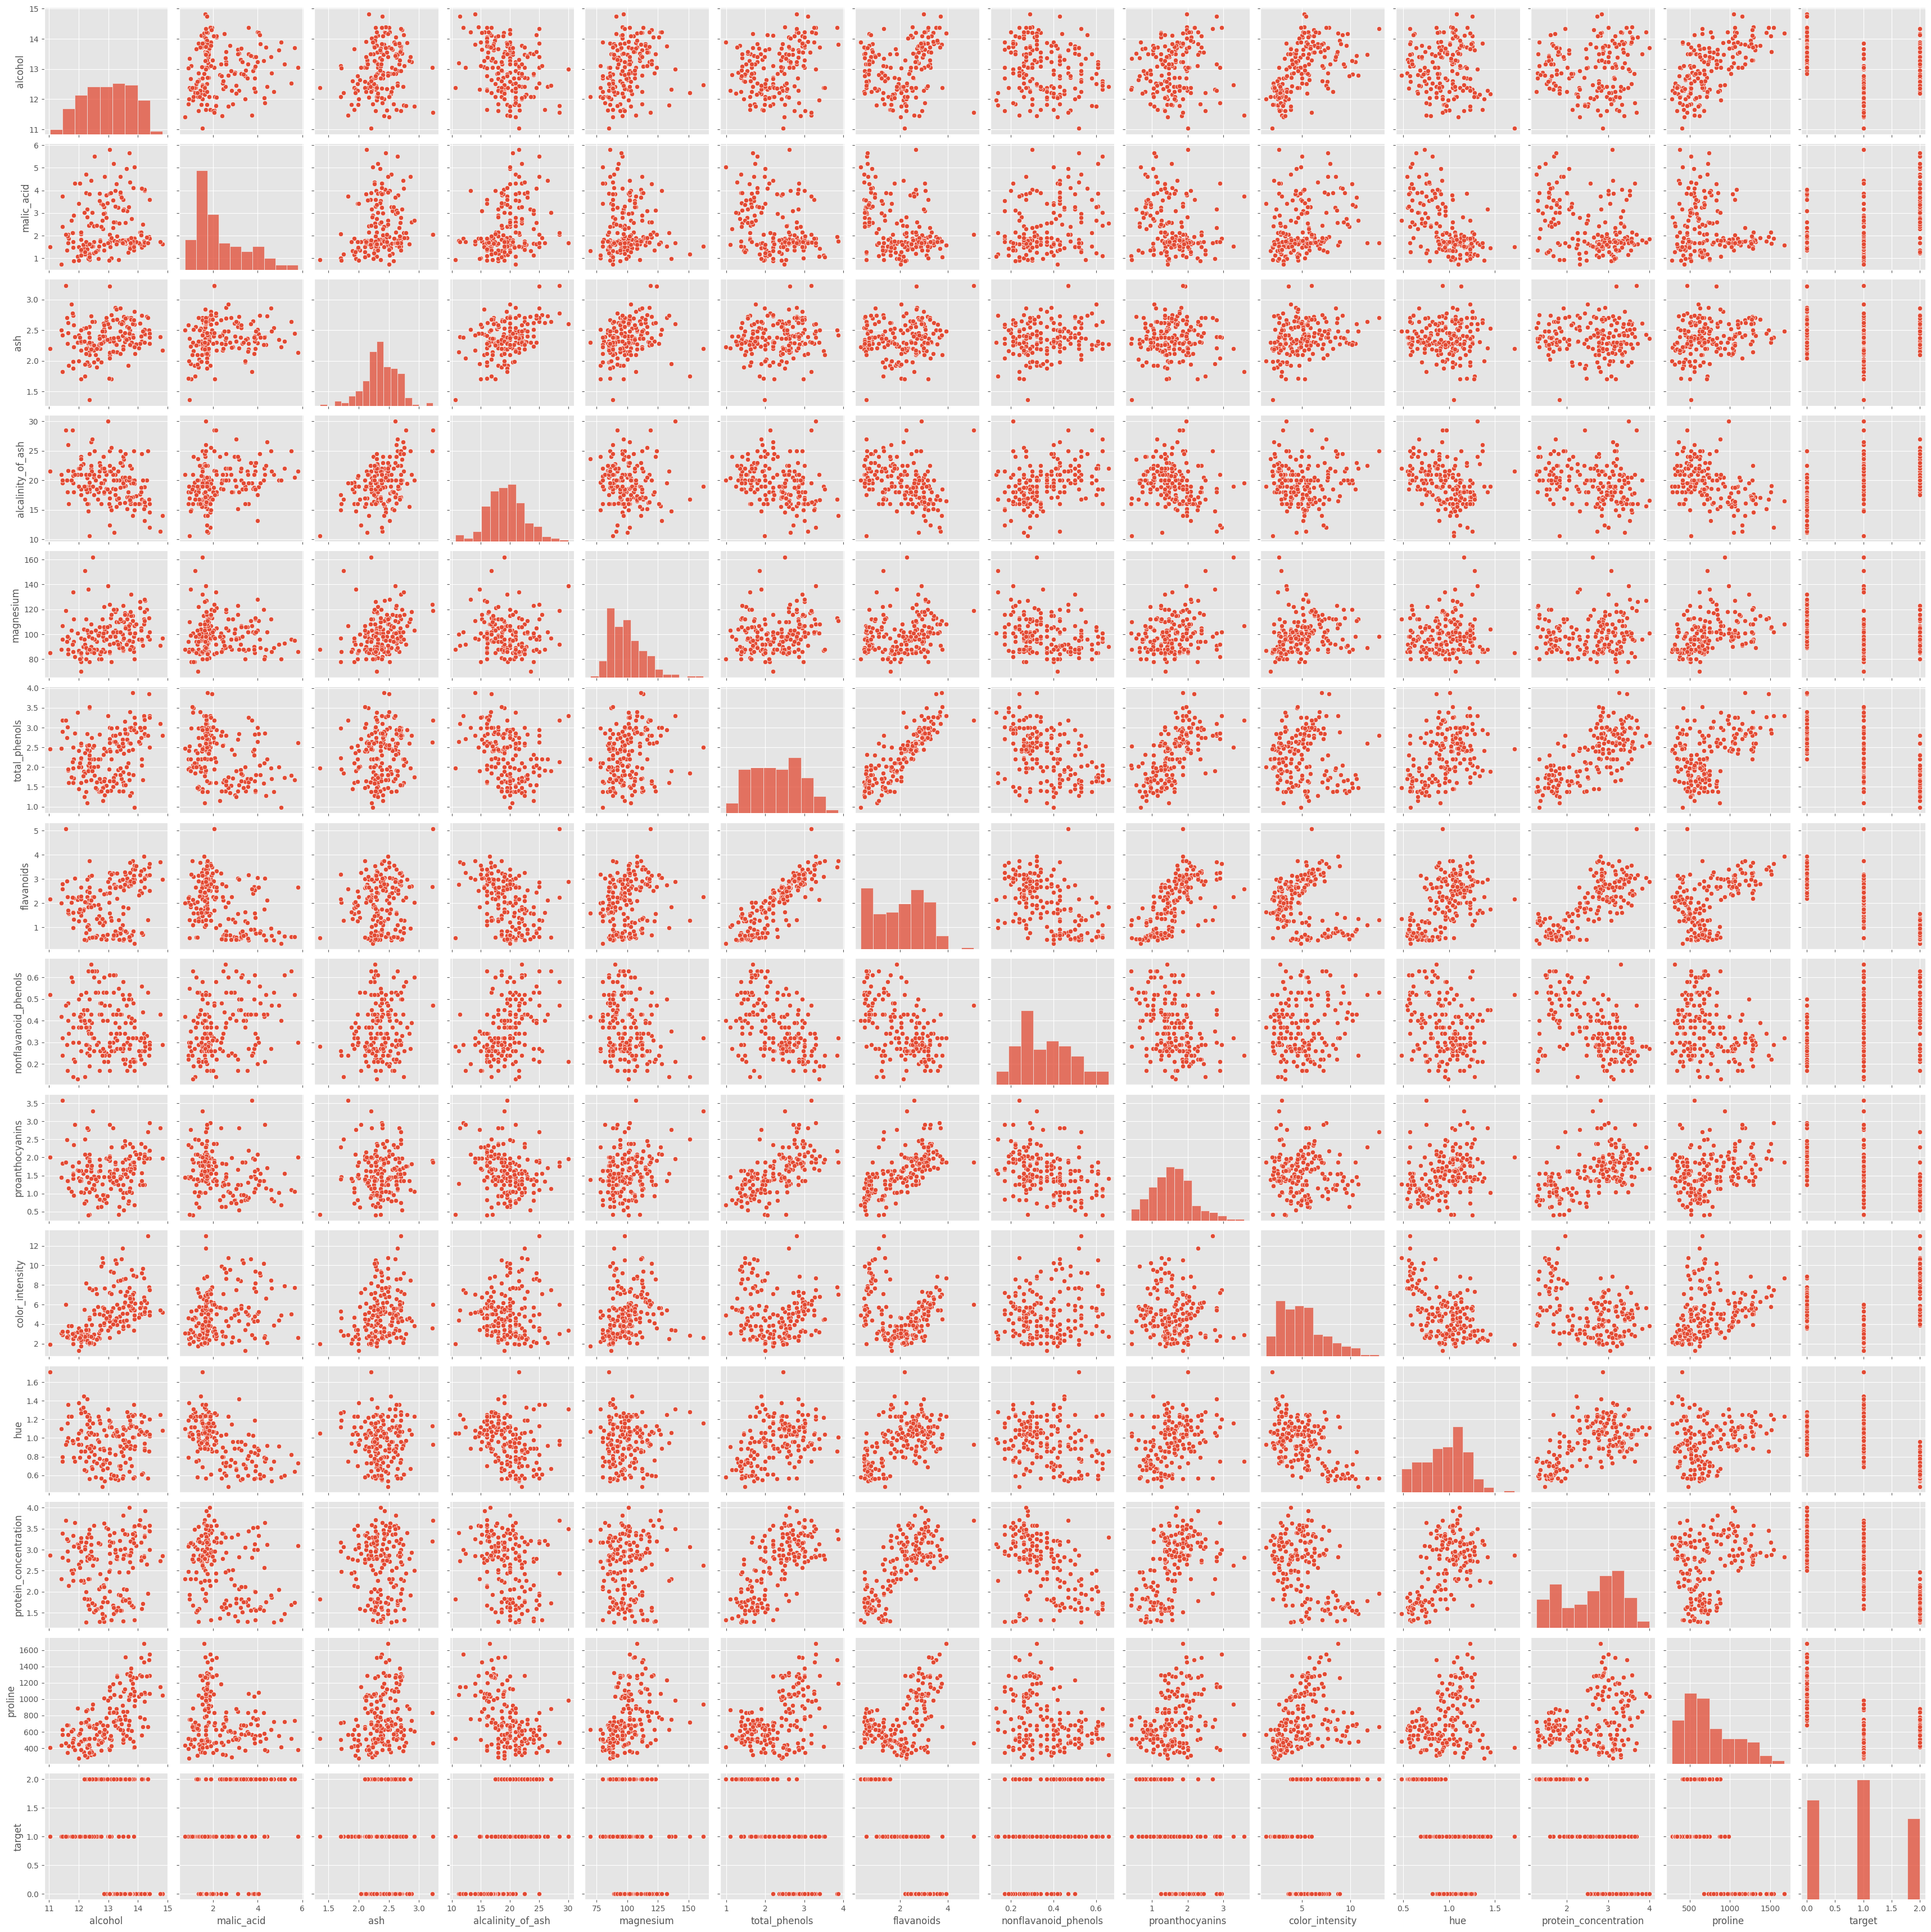

In [26]:
sns.pairplot(df)

"*Pairplot* displays all the variables against each other in a scatterplot. It is very useful for grasping the most important relationships without having to go through every single combination manually"

"It is computationally expensive to compute, so it is best suited for datasets with relatively low number of variables like this one"

**"The best way to understand the relationship between a numeric variable and a categorical variable is through a boxplot"**

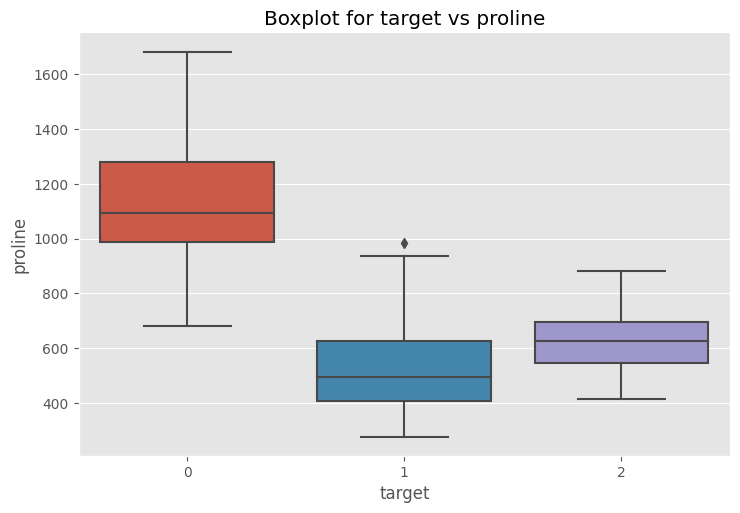

In [27]:
# Boxplot for variables with more marked segmentations for a given wine type
# Proline
sns.catplot(data=df, x='target', y='proline', kind='box', aspect=1.5)
plt.title('Boxplot for target vs proline')
plt.show()

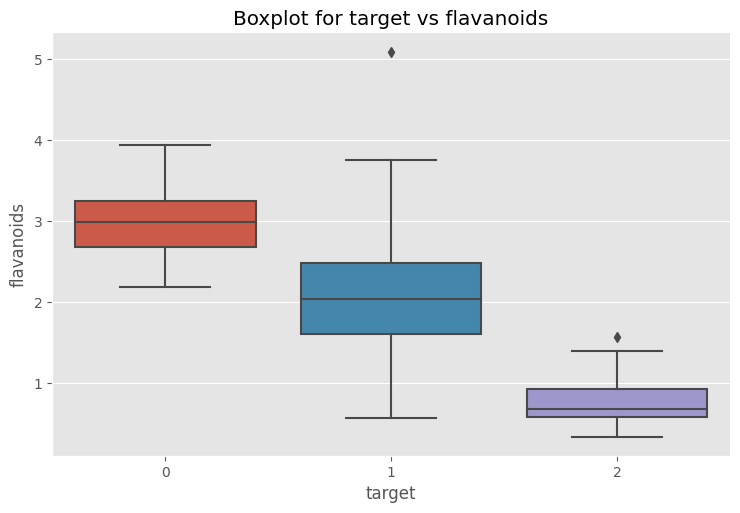

In [28]:
# Flavanoids
sns.catplot(data=df, x='target', y='flavanoids', kind='box', aspect=1.5)
plt.title('Boxplot for target vs flavanoids')
plt.show()

Is it possible that type 0 wines have higher combined levels of proline and flavanoids?

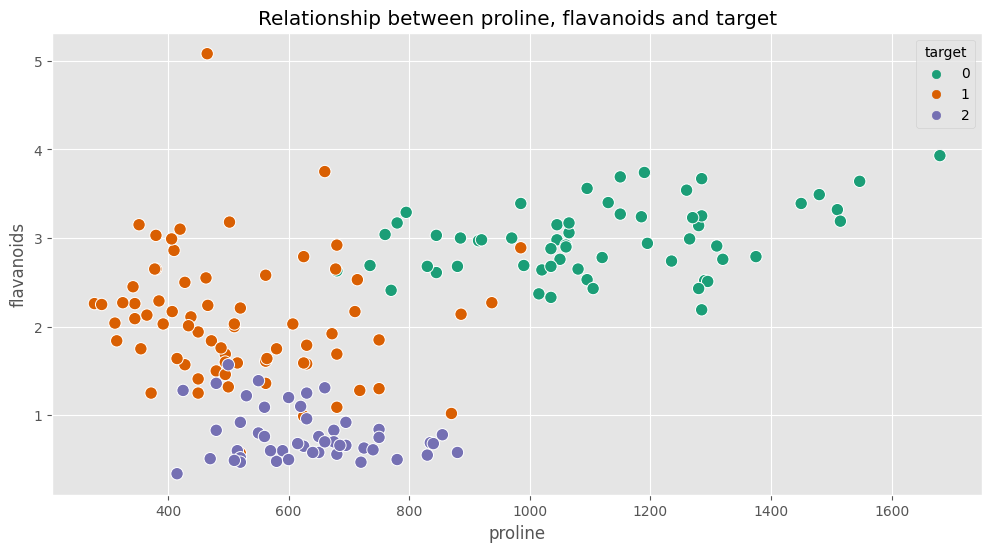

In [29]:
sns.scatterplot(data=df, x='proline', y='flavanoids', hue='target', palette='Dark2', s=80)
plt.title('Relationship between proline, flavanoids and target')
plt.show()

Type 0 wines show clear patterns of flavanoids and proline. Proline levels are much higher while flavanoid level is stable around the value of 3.

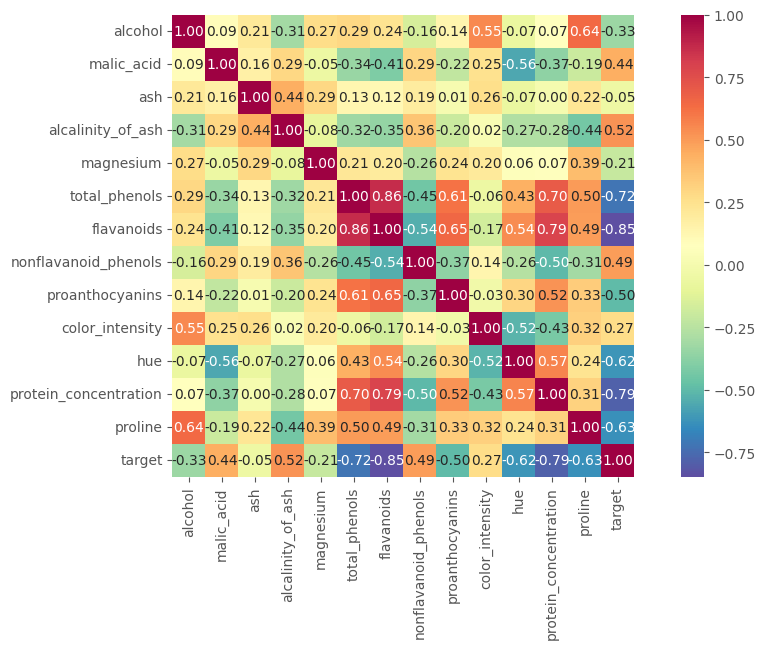

In [30]:
corrmat = df.corr()
hm = sns.heatmap(corrmat,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 10},
                yticklabels=df.columns,
                xticklabels=df.columns,
                cmap='Spectral_r')

plt.show()

"The heat map is useful because it allows us to efficiently grasp which variables are strongly correlated with each other."

### 5. Brainstorming

What to do next?

* Create a report for the stakeholders

* Do modelling

* Continue with the exploration to further clarify business questions